In [1]:
import pandas as pd

In [2]:
customer = pd.read_csv(r'C:/Users/aadis/Downloads/mall_customers.csv')

In [3]:
customer

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X= customer.iloc[:, [3,4]].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
customer_std = scaler.fit_transform(X)
customer_std

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [12]:
from sklearn.cluster import KMeans

In [15]:
wcss=[]
for i in range(1,11):
 kmeans = KMeans(n_clusters=i, init ='k-means++', n_init=10, max_iter=300, random_state=0)
 kmeans.fit(customer_std)
 wcss.append(kmeans.inertia_)
wcss

C:\Users\aadis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[400.00000000000006,
 269.0167937490666,
 157.70400815035944,
 108.92131661364357,
 65.56840815571681,
 55.057348270385994,
 44.91118554999014,
 37.18175782682131,
 32.37525368158287,
 29.076176851244274]

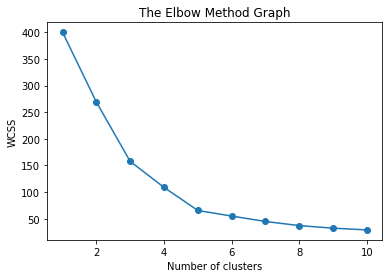

In [22]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss, marker = "o")
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
from sklearn.metrics import silhouette_score
for n_cluster in [4,5,6,7,8,9,10]:
 kmeans = KMeans(n_clusters=n_cluster).fit(customer_std)

 silhouette_avg = silhouette_score(
 customer_std,
 kmeans.labels_)

 print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 4 Clusters: 0.4939
Silhouette Score for 5 Clusters: 0.5547
Silhouette Score for 6 Clusters: 0.5381
Silhouette Score for 7 Clusters: 0.5317
Silhouette Score for 8 Clusters: 0.4567
Silhouette Score for 9 Clusters: 0.4565
Silhouette Score for 10 Clusters: 0.4504


In [24]:
km = KMeans(n_clusters= 5, init= 'k-means++', n_init= 10, max_iter= 300, random_state= 0).fit(customer_std)

In [25]:
clusters = km.fit_predict(customer_std)
clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [26]:
customer['label'] = clusters
customer

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


In [27]:
centroids = pd.DataFrame(km.cluster_centers_, columns = ['Annual Income (k$)','Spending Score (1-100)'])
centroids

,Annual Income (k$),Spending Score (1-100)
0,1.055003,-1.284439
1,-0.200913,-0.026456
2,0.991583,1.239503
3,-1.329545,1.132178
4,-1.307519,-1.136965


In [28]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
centroids

,Annual Income (k$),Spending Score (1-100),cluster
0,1.055003,-1.284439,Cluster 0
1,-0.200913,-0.026456,Cluster 1
2,0.991583,1.239503,Cluster 2
3,-1.329545,1.132178,Cluster 3
4,-1.307519,-1.136965,Cluster 4


In [29]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

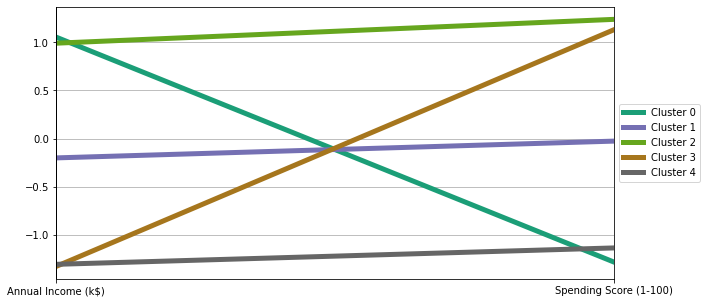

In [30]:
plt.figure(figsize=(10,5))
parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

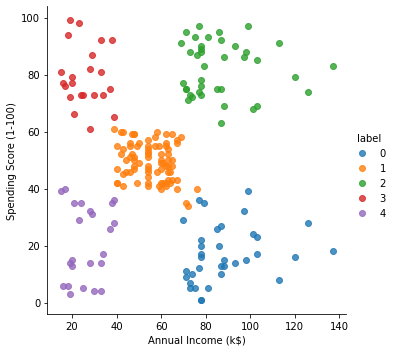

In [31]:
import seaborn as sns
sns.lmplot(data=customer, x='Annual Income (k$)', y='Spending Score (1-100)', hue='label',
 fit_reg=False,legend=True)